In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fish = pd.read_csv('Fish.csv')

# The dataset features description:

- Species: Name of the fish species
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm


This data is about characteristic of the fish species by its weight, lenght, height, and width.
In this chance, I want to predict the weight of the fish.

# DATA PRE PROCESSING

In [3]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
fish[fish['Weight']<0]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
fish = fish.rename(columns={'Length1':'VerticalLength', 'Length2':'DiagonalLength', 'Length3':'CrossLength'})

# EDA and DATA VISUALIZATION

In [8]:
fish_kind = fish.Species.value_counts(normalize=True)
fish_kind

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

<AxesSubplot:>

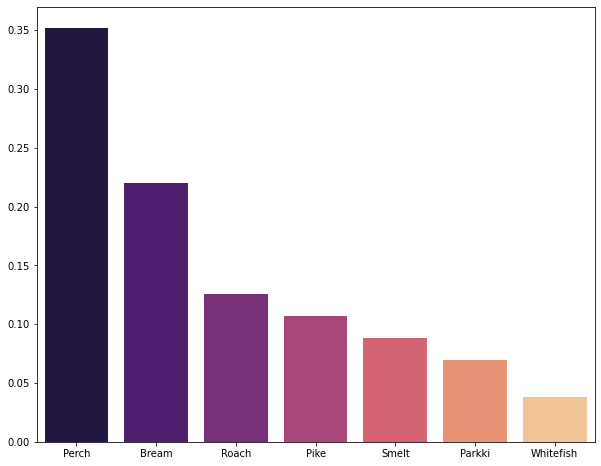

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=fish_kind.keys(), y=fish_kind.values, palette='magma')

The dataset has 35% perch, 22% beam, 12.5% roach, 10.7% pike, 8% smelt, 7% Parkki, and 4% Whitefish

<AxesSubplot:xlabel='Species', ylabel='Weight'>

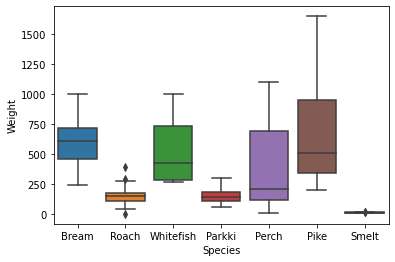

In [10]:
sns.boxplot(x='Species', y='Weight', data=fish)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Weight'>

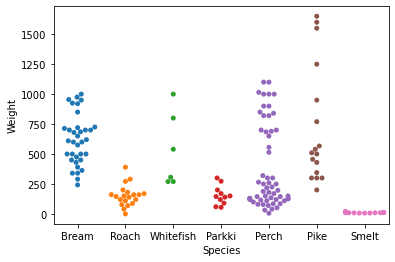

In [11]:
sns.swarmplot(x='Species', y='Weight', data=fish)

In [12]:
fish.groupby(['Species']).median()

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
Species,,,,,,
Bream,610.00,30.40,33.00,38.50,14.9544,5.2801
Parkki,145.00,19.00,20.70,23.20,8.8928,3.2928
Perch,207.50,23.25,25.30,26.75,6.9218,4.1549
Pike,510.00,40.10,43.00,45.80,7.2900,4.8700
Roach,147.50,20.50,22.25,24.85,6.5126,3.6027
Smelt,9.85,11.30,11.80,13.10,2.2002,1.2731
Whitefish,423.00,27.05,29.50,32.40,9.7610,5.6033


- From this plot , we know  most roach, Parkki, and Smelt have weight below 250. Smelt has the smallest weight among the species
- Perch also has weight with median below 250, but from this we know perch species can grow and have weight more than 250.
- Bream have median weight 610, have weight between 250 until 1000
- Whitefish have median weight 423
- Roach have median weight 147.50
- Parrki have median weight 145
- Pike have median weight 510 but also can grow to 1500

<AxesSubplot:xlabel='Species', ylabel='VerticalLength'>

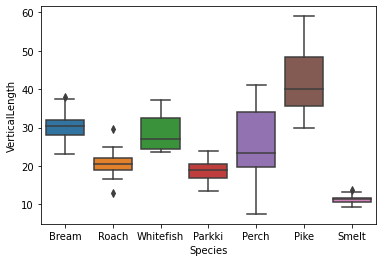

In [13]:
sns.boxplot(x='Species', y='VerticalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='VerticalLength'>

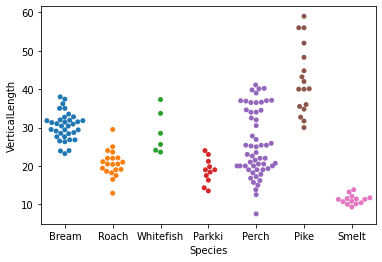

In [14]:
sns.swarmplot(x='Species', y='VerticalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='DiagonalLength'>

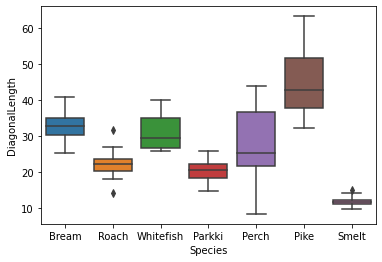

In [15]:
sns.boxplot(x='Species', y='DiagonalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='DiagonalLength'>

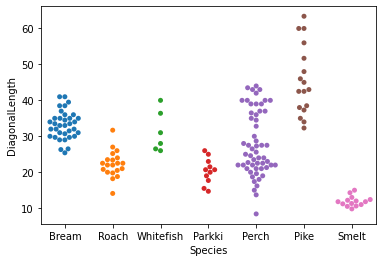

In [16]:
sns.swarmplot(x='Species', y='DiagonalLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='CrossLength'>

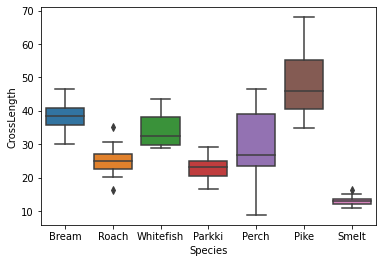

In [17]:
sns.boxplot(x='Species', y='CrossLength', data=fish)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='CrossLength'>

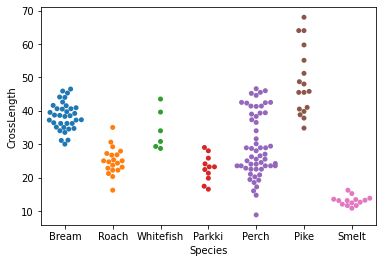

In [18]:
sns.swarmplot(x='Species', y='CrossLength', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Width'>

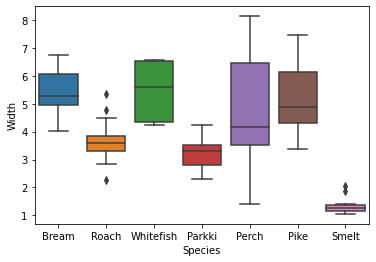

In [19]:
sns.boxplot(x='Species', y='Width', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Width'>

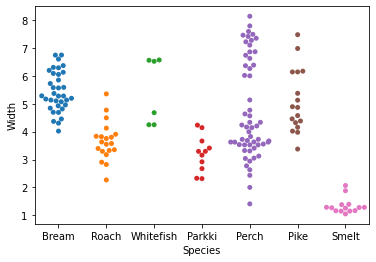

In [20]:
sns.swarmplot(x='Species', y='Width', data=fish)

<AxesSubplot:xlabel='Species', ylabel='Height'>

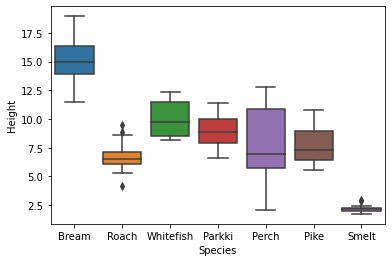

In [21]:
sns.boxplot(x='Species', y='Height', data=fish)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Height'>

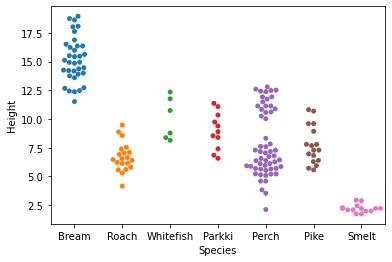

In [22]:
sns.swarmplot(x='Species', y='Height', data=fish)

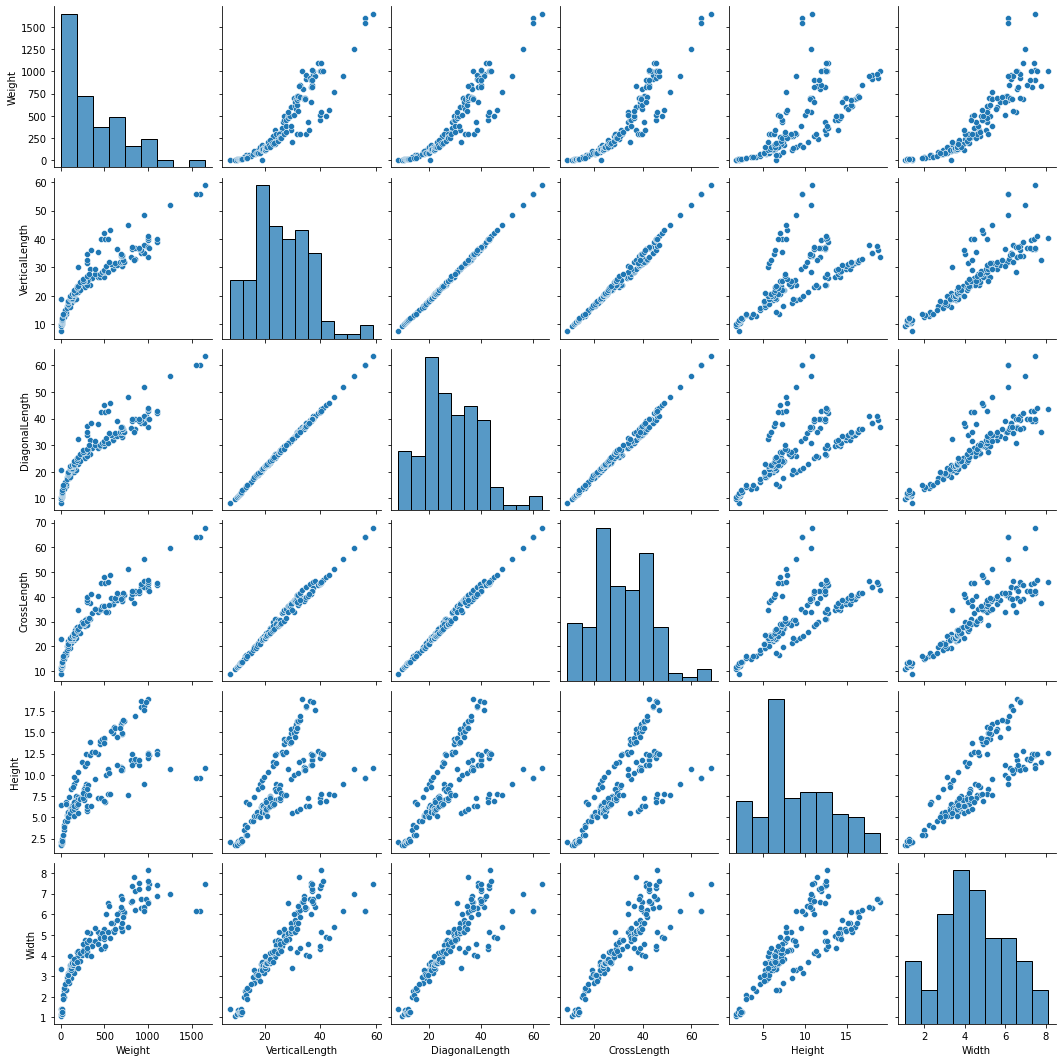

In [23]:
sns.pairplot(fish)

In [24]:
fish

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [25]:
numeric = fish.select_dtypes(exclude='object')
numeric

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

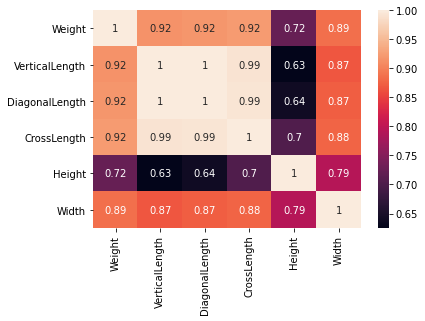

In [26]:
sns.heatmap(numeric.corr(), annot=True)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Lenght')

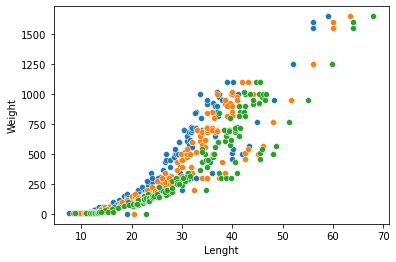

In [27]:
sns.scatterplot(numeric['VerticalLength'], numeric['Weight'])
sns.scatterplot(numeric['DiagonalLength'], numeric['Weight'])
sns.scatterplot(numeric['CrossLength'], numeric['Weight'])
plt.xlabel('Lenght')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

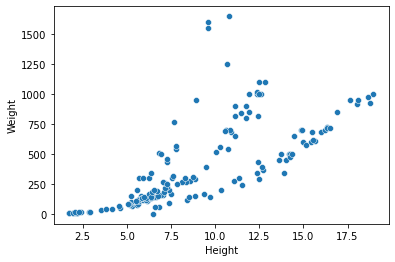

In [28]:
sns.scatterplot(numeric['Height'], numeric['Weight'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


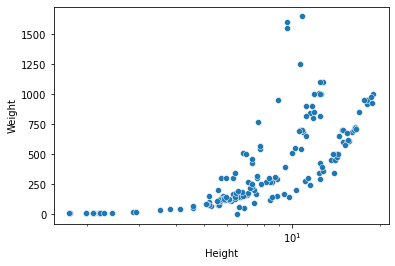

In [29]:
sns.scatterplot(numeric['Height'], numeric['Weight'])
plt.xscale('log')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width', ylabel='Weight'>

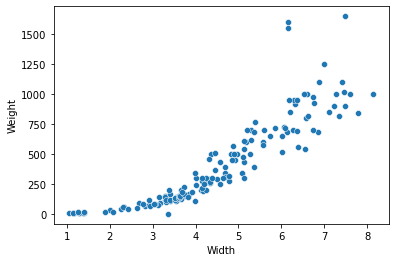

In [30]:
sns.scatterplot(numeric['Width'], numeric['Weight'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


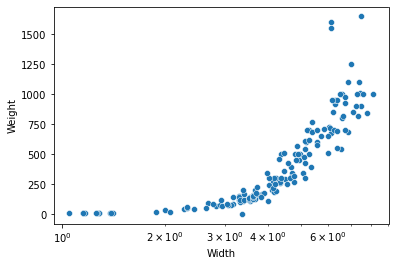

In [31]:
sns.scatterplot(numeric['Width'], numeric['Weight'])
plt.xscale('log')

# FEATURE ENGINEERING

In [32]:
predictors = fish.drop(columns=['Weight'])
target =  fish['Weight']

- Finding VIF score to avoid multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
a = predictors.select_dtypes('number')
vif = pd.DataFrame()
vif['feature'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(len(a.columns))]

print(vif)


          feature           VIF
0  VerticalLength  12782.535830
1  DiagonalLength  16598.744318
2     CrossLength   3380.815907
3          Height     76.064364
4           Width     92.658672


In [34]:
predictors = predictors.drop(columns=['VerticalLength'])

In [35]:
vif = pd.DataFrame()
a = predictors.select_dtypes('number')
vif['feature'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(len(a.columns))]

print(vif)


          feature          VIF
0  DiagonalLength  3305.983443
1     CrossLength  3380.711180
2          Height    70.504117
3           Width    92.536556


In [36]:
predictors = predictors.drop(columns=['CrossLength'])

In [37]:
vif = pd.DataFrame()
a = predictors.select_dtypes('number')
vif['feature'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(len(a.columns))]

print(vif)


          feature        VIF
0  DiagonalLength  32.760121
1          Height  14.984667
2           Width  53.745173


In [38]:
predictors

,Species,DiagonalLength,Height,Width
0,Bream,25.4,11.5200,4.0200
1,Bream,26.3,12.4800,4.3056
2,Bream,26.5,12.3778,4.6961
3,Bream,29.0,12.7300,4.4555
4,Bream,29.0,12.4440,5.1340
...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936
155,Smelt,12.4,2.4300,1.2690
156,Smelt,13.0,2.2770,1.2558
157,Smelt,14.3,2.8728,2.0672


In [39]:
predictors['Species']

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

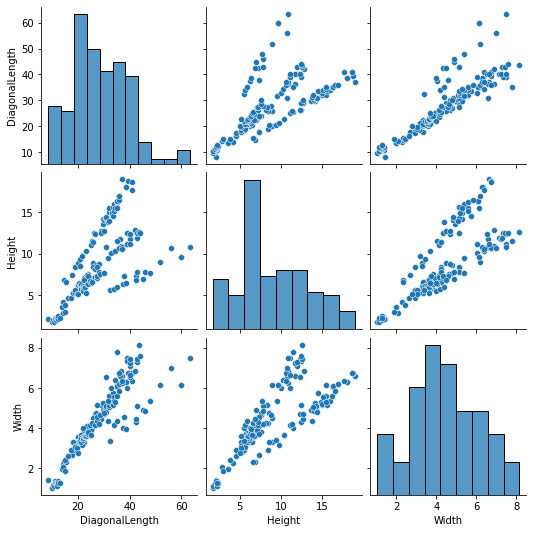

In [40]:
sns.pairplot(predictors)

In [41]:
predictor_num = predictors.drop(['Species'],axis=1)

In [42]:
predictor_num['D1'] = predictor_num['DiagonalLength']**2
predictor_num['D2'] = predictor_num['DiagonalLength']**3
predictor_num['H1'] = predictor_num['Height']**2
predictor_num['H2'] = predictor_num['Height']**3
predictor_num['Width'] = predictor_num['Width']**2
predictor_num['Width'] = predictor_num['Width']**3

predictor_num.head()

,DiagonalLength,Height,Width,D1,D2,H1,H2
0,25.4,11.5200,4220.426278,645.16,16387.064,132.710400,1528.823808
1,26.3,12.4800,6370.918986,691.69,18191.447,155.750400,1943.764992
2,26.5,12.3778,10725.659804,702.25,18609.625,153.209933,1896.401907
3,29.0,12.7300,7823.096511,841.00,24389.000,162.052900,2062.933417
4,29.0,12.4440,18311.974969,841.00,24389.000,154.853136,1926.992424


In [43]:
m = len(predictor_num)
predictor_num = predictor_num/(predictor_num.max())

In [44]:
predictor_num

,DiagonalLength,Height,Width,D1,D2,H1,H2
0,0.400631,0.607691,0.014487,0.160505,0.064303,0.369288,0.224413
1,0.414826,0.658332,0.021868,0.172081,0.071384,0.433401,0.285322
2,0.417981,0.652941,0.036816,0.174708,0.073025,0.426332,0.278369
3,0.457413,0.671520,0.026853,0.209227,0.095703,0.450939,0.302814
4,0.457413,0.656433,0.062856,0.209227,0.095703,0.430904,0.282860
...,...,...,...,...,...,...,...
154,0.192429,0.110271,0.000025,0.037029,0.007125,0.012160,0.001341
155,0.195584,0.128185,0.000014,0.038253,0.007482,0.016431,0.002106
156,0.205047,0.120114,0.000013,0.042044,0.008621,0.014427,0.001733
157,0.225552,0.151543,0.000268,0.050874,0.011475,0.022965,0.003480


In [45]:
y =  target

In [70]:
def hypothesis(predictor_num, theta):
    h_theta = theta*predictor_num
    return np.sum(h_theta, axis=1)

In [71]:
##cost function
def cost(predictors_num, y, theta):
    h_theta = hypothesis(predictor_num, theta)
    return (np.sqrt((h_theta-y)**2))/ (2*m)

In [72]:
def gradientDescent(predictors_num, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        h_theta = hypothesis(predictors_num, theta)
        for c in range(0, len(predictors_num.columns)):
            theta[c] = theta[c] - alpha*sum((h_theta-y)* predictor_num.iloc[:, c])/m
        j = cost(predictors_num, y, theta)
        J.append(j)
        k += 1
    return J, theta

In [73]:
theta = np.array([0.0]*len(predictor_num.columns))
J, theta = gradientDescent(predictor_num, y, theta, 0.05, 800)

In [74]:
y_hat = hypothesis(predictor_num, theta)

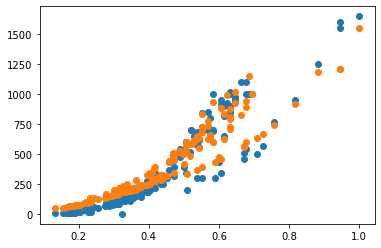

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=predictor_num['DiagonalLength'],y= y)           
plt.scatter(x=predictor_num['DiagonalLength'], y=y_hat)
plt.show()

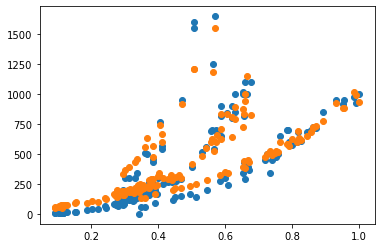

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=predictor_num['Height'],y= y)           
plt.scatter(x=predictor_num['Height'], y=y_hat)
plt.show()

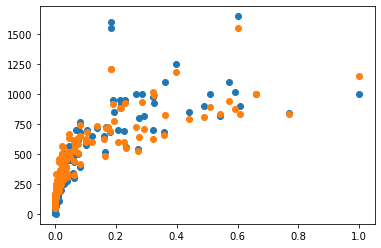

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=predictor_num['Width'],y= y)           
plt.scatter(x=predictor_num['Width'], y=y_hat)
plt.show()

In [92]:
predictor_num['Species'] = fish['Species']